In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split


In [79]:
train_data= pd.read_csv(r"C:\Users\telud\Downloads\Data_Train.csv")

In [80]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,3/22/2022 1:10,2h 50m,non-stop,No info,3897
1,Air India,1/5/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,5:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/6/2019,Delhi,Cochin,DEL → LKO → BOM → COK,9:25,6/10/2022 4:25,19h,2 stops,No info,13882
3,IndiGo,12/5/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,1/3/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [81]:
train_data['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10682, dtype: int64

In [82]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [83]:
train_data.dropna(inplace=True)

In [84]:
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [85]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [86]:
train_data['Journey_day']=train_data['Date_of_Journey'].dt.day
train_data['Journey_month']=train_data['Date_of_Journey'].dt.month

In [87]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [88]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
    
def extract_min(df,col):
    df[col+'_hour']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)

In [89]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')


In [90]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [91]:
duration= list(train_data['Duration'])

In [92]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
        else:
            duration[i]='0h'+ duration[i]

In [93]:
train_data['Duration']= duration

In [94]:
def hour(x):
    return x.split(' ')[0][0:-1]
    
def minute(x):
    return x.split(' ')[1][0:-1]
    

In [95]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [96]:
train_data['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10677     4107
10678     4145
10679     7229
10680    12648
10681    11753
Name: Price, Length: 10681, dtype: int64

In [97]:
drop_column(train_data,'Duration')

In [98]:

train_data['Duration_mins']= train_data['Duration_mins'].astype(int)

In [99]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)

In [100]:
train_data.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
Journey_day           int64
Journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Duration_hours        int32
Duration_mins         int32
dtype: object

In [101]:
data_train['Price']

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10681, dtype: float64

In [102]:
cat_col=[col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [103]:
cant_col=[col for col in train_data.columns if train_data[col].dtype!='O']
cant_col

['Price',
 'Journey_day',
 'Journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Duration_hours',
 'Duration_mins']

In [104]:
categorical=train_data[cat_col]

In [105]:
categorical['Route_1']=categorical['Route'].str.split('→').str[0]
categorical['Route_2']=categorical['Route'].str.split('→').str[1]
categorical['Route_3']=categorical['Route'].str.split('→').str[2]
categorical['Route_4']=categorical['Route'].str.split('→').str[3]
categorical['Route_5']=categorical['Route'].str.split('→').str[4]

In [106]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [107]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,50,35,4,45


In [108]:
drop_column(categorical,'Route')

In [109]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10635
dtype: int64

In [110]:
for i in ['Route_3', 'Route_4', 'Route_5']:
    categorical[i].fillna( 'None',inplace=True)

In [111]:
encoder=LabelEncoder()

In [112]:
for i in ['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [113]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,34,8,13,5


In [114]:
dict={'non-stop' :0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}


In [115]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)


In [116]:
data_train=pd.concat([categorical.Airline,Source,Destination,train_data[cat_col]],axis=1)


In [117]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,20,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,50,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,25,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,5,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,50,35,4,45


In [118]:
Airline=pd.get_dummies (categorical['Airline'],drop_first=True)


In [119]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)


In [120]:
Destination=pd.get_dummies (categorical['Destination'],drop_first=True)


In [121]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cant_col]],axis=1)


In [122]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,No info,0,13,29,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,3897,24,3,20,10,2,50
1,Air India,Kolkata,Banglore,2,No info,2,25,1,3,5,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,7662,5,1,50,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,3,32,4,5,5,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,13882,6,9,25,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,2,34,3,13,5,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,6218,5,12,5,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,0,34,8,13,5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,13302,3,1,50,35,4,45


In [123]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [124]:
pd.set_option('display.max_columns',35)
data_train.head()

,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,0,No info,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,20,10,2,50
1,2,No info,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,50,15,7,25
2,2,No info,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,25,25,19,0
3,1,No info,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,5,30,5,25
4,1,No info,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,50,35,4,45


In [125]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])


In [126]:
def plot(df,col):
    fig, (ax1, ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col], ax=ax2)

C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\telud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


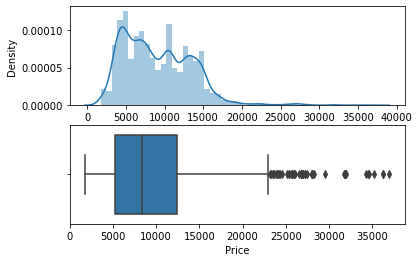

In [127]:
plot(data_train,'Price')

In [129]:
drop_column(data_train, 'Airline')

KeyError: "['Airline'] not found in axis"

In [130]:
drop_column(data_train, 'Source')


KeyError: "['Source'] not found in axis"

In [131]:
drop_column(data_train, 'Additional_Info')


In [132]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,50,35,4,45


In [133]:
X= data_train.drop('Price',axis=1)

In [134]:
X.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Journey_day,Journey_month,Dep_Time_hour,Arrival_Time_hour,Duration_hours,Duration_mins
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,20,10,2,50
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,50,15,7,25
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,25,25,19,0
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,5,30,5,25
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,50,35,4,45


In [135]:
y= data_train['Price']

In [136]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10677     4107.0
10678     4145.0
10679     7229.0
10680    12648.0
10681    11753.0
Name: Price, Length: 10681, dtype: float64

In [140]:
mutual_info_classif(X,y)

array([2.12675917e+00, 2.03218126e+00, 2.75550702e+00, 2.29814372e+00,
       1.50837535e+00, 7.47705632e-01, 7.65127363e-01, 9.63210548e-02,
       6.80084874e-01, 9.29586710e-01, 1.25075071e-03, 5.78591151e-01,
       0.00000000e+00, 3.36965070e-01, 0.00000000e+00, 2.21953978e-01,
       4.94618459e-03, 1.68989484e-01, 1.54981531e+00, 8.78049065e-01,
       3.10066342e-01, 1.56423064e+00, 3.99159999e-01, 2.85634181e-01,
       1.61997305e-01, 3.87200323e-01, 1.09552110e+00, 8.99793672e-01,
       1.19568603e+00, 1.52960010e+00, 1.79059549e+00, 1.05884120e+00])

In [141]:
imp=pd.DataFrame (mutual_info_classif(X,y),index=X.columns)
imp

,0
Total_Stops,2.162247
Route_1,2.033268
Route_2,2.776476
Route_3,2.334929
Route_4,1.480495
Route_5,0.747385
Air India,0.751923
GoAir,0.096242
IndiGo,0.677129
Jet Airways,0.923443


In [143]:
imp.columns=['importance']
imp.sort_values(by='importance', ascending=False)

,importance
Route_2,2.776476
Route_3,2.334929
Total_Stops,2.162247
Route_1,2.033268
Duration_hours,1.786136
Delhi,1.546993
Arrival_Time_hour,1.540221
Cochin,1.516446
Route_4,1.480495
Dep_Time_hour,1.199324


In [144]:
X_train, X_test, y_train, y_test=train_test_split (X,y,test_size=0.2)


In [145]:
from sklearn import metrics


In [146]:
def predict (ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are :\n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score is : {}'.format(r2_score))
    print('MAE :', metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE :', metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

In [147]:
from sklearn.ensemble import RandomForestRegressor


Training score : 0.952273379500483
predictions are :
 [ 7302.54       15834.79166667 12507.535      ...  5151.65
  6305.77        8042.975     ]


r2 score is : 0.8131447447078719
MAE : 1156.6015760096893
MSE : 3601584.491856098
RMSE : 1897.7841004329491


C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


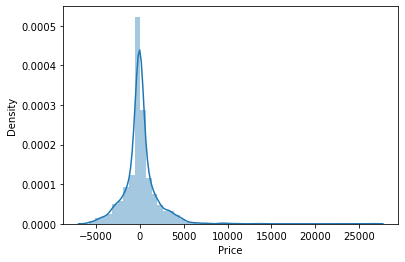

In [148]:
predict(RandomForestRegressor())


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


Training score : 0.6187812145907459
predictions are :
 [ 8701.35051869 12522.1569265  12110.69222213 ...  9276.56699679
  8154.77020572  8275.84078446]


r2 score is : 0.6017229420068
MAE : 1954.029801882117
MSE : 7676682.538512529
RMSE : 2770.682684558542


C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


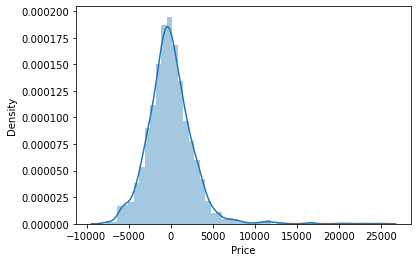

In [151]:
predict(LinearRegression())

Training score : 0.7734099664404375
predictions are :
 [ 6494.  14243.6 11817.  ...  5891.2  7011.2  5766.2]


r2 score is : 0.6250530968708452
MAE : 1771.8035563874591
MSE : 7227000.115507721
RMSE : 2688.3080395497313


C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


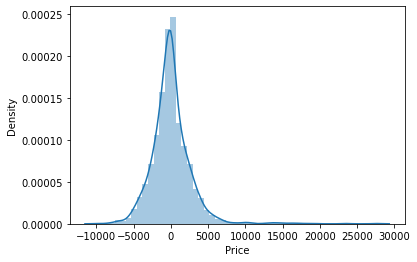

In [152]:
predict(KNeighborsRegressor())

Training score : 0.870435393258427
predictions are :
 [ 6979. 15764. 13584. ...  4804.  6493. 10216.]


r2 score is : 0.6840943400547228
MAE : 1374.514272344408
MSE : 6088996.12681329
RMSE : 2467.589132496188


C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


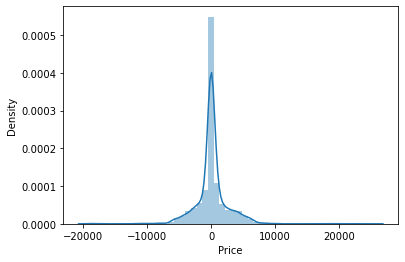

In [153]:
predict(DecisionTreeClassifier())

In [154]:
from sklearn.svm import SVR


Training score : 0.052196250462130056
predictions are :
 [8349.50923661 8573.94363131 8548.7641639  ... 8375.5543873  8460.84321462
 7866.68042586]


r2 score is : 0.05738434846621354
MAE : 3346.536598485241
MSE : 18168661.65758806
RMSE : 4262.471308711421


C:\Users\telud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


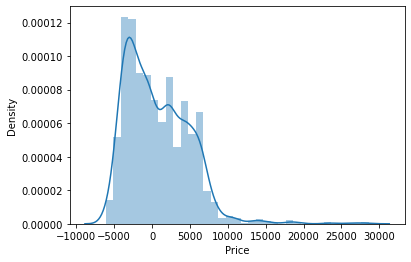

In [155]:
predict(SVR())